**CDJ FA 25: Mapping Biodiversity**

In [1]:
#import packages

import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib as plt
import os as os

In [2]:
#change working directory
os.chdir("/Users/tianyichen/Desktop/CDJ Fa25")

In [3]:
#import csvs from working directories
df_field = pd.read_csv("Algae_FieldData.csv")
df_master = pd.read_csv("Algae_Mastersheet.csv")

In [4]:
#print csvs
print(df_field.head())

  Sample_ID                      Location               Site_Name Site_ID  \
0    RPT_01  Upper Klamath Lake, OR (UKL)       Rattlesnake Point     RPT   
1       WRM  Upper Klamath Lake, OR (UKL)  Williamson River Mouth     WRM   
2        PB  Upper Klamath Lake, OR (UKL)             Pelican Bay      PB   
3    RPT_02  Upper Klamath Lake, OR (UKL)       Rattlesnake Point     RPT   
4     HB_01  Upper Klamath Lake, OR (UKL)              Howard Bay      HB   

         Lat        Long Sampling_Date Sampling_Time Timezone  USGS_siteno  \
0  42.344360 -121.857150      7/5/2022    8:55:00 AM      PDT          NaN   
1  42.463540 -121.958830      7/5/2022    9:30:00 AM      PDT          NaN   
2  42.457420 -122.071390      7/5/2022   10:35:00 AM      PDT          NaN   
3  42.344304 -121.858196     7/25/2022    9:50:00 AM      PDT          NaN   
4  42.315390 -121.941946     7/25/2022    9:20:00 AM      PDT          NaN   

   ...  TAL PC ug/L  Wiper Position volt  B-G Algae mg/L  Nitrate mg

In [5]:
print(df_field.columns)

Index(['Sample_ID', 'Location', 'Site_Name', 'Site_ID', 'Lat', 'Long',
       'Sampling_Date', 'Sampling_Time', 'Timezone', 'USGS_siteno',
       'Avg_WaterTemp_degC', 'Avg_pH', 'Avg_SpecConductance (uS/cm)', 'DO (%)',
       'DO (mg/L)', 'Barometric Pressure', 'Depth (Meters)', 'pH mV',
       'Battery volts', 'Turbidity', 'Chlorophyll RFU', 'Chlorophyll ug/L',
       'fDOM QSU', 'fDOM RFU', 'ORP mV', 'TAL PC RFU', 'TAL PC ug/L',
       'Wiper Position volt', 'B-G Algae mg/L', 'Nitrate mg/L', 'fCHL',
       'Secchi Depth', 'BGA-PC ug/L', 'Phyco-cyanin ug/L',
       'Discharge (cu.ft/s)', 'Notes'],
      dtype='object')


In [6]:
print(df_master.head())
print(df_master.columns)

  Sample_ID                      Location        Instrument  \
0    RPT_01  Upper Klamath Lake, OR (UKL)  Resonon Pika XC2   
1    RPT_01  Upper Klamath Lake, OR (UKL)  Resonon Pika XC2   
2    RPT_01  Upper Klamath Lake, OR (UKL)  Resonon Pika XC2   
3    RPT_01  Upper Klamath Lake, OR (UKL)  Resonon Pika XC2   
4    RPT_01  Upper Klamath Lake, OR (UKL)  Resonon Pika XC2   

     Spectrum_ID_Algal    Spectrum_ID_Water Morphological ID     Morphologist  \
0  Spectrum_0001_Algal  Spectrum_0001_Water     Gloeotrichia  Sarah Spaulding   
1  Spectrum_0002_Algal  Spectrum_0002_Water    Aphanizomenon  Sarah Spaulding   
2  Spectrum_0003_Algal  Spectrum_0003_Water   Dolichospermum  Sarah Spaulding   
3  Spectrum_0004_Algal  Spectrum_0004_Water     Gloeotrichia  Sarah Spaulding   
4  Spectrum_0005_Algal  Spectrum_0005_Water    Aphanizomenon  Sarah Spaulding   

  Objective  
0       20x  
1       20x  
2       20x  
3       20x  
4       20x  
Index(['Sample_ID', 'Location', 'Instrument', 'Spe

In [7]:
#aggregate into one big csv using pd.merge
merged_df = pd.merge(df_field, df_master, on='Sample_ID', how='inner')

In [8]:
print(merged_df.head())

  Sample_ID                    Location_x          Site_Name Site_ID  \
0    RPT_01  Upper Klamath Lake, OR (UKL)  Rattlesnake Point     RPT   
1    RPT_01  Upper Klamath Lake, OR (UKL)  Rattlesnake Point     RPT   
2    RPT_01  Upper Klamath Lake, OR (UKL)  Rattlesnake Point     RPT   
3    RPT_01  Upper Klamath Lake, OR (UKL)  Rattlesnake Point     RPT   
4    RPT_01  Upper Klamath Lake, OR (UKL)  Rattlesnake Point     RPT   

        Lat       Long Sampling_Date Sampling_Time Timezone  USGS_siteno  ...  \
0  42.34436 -121.85715      7/5/2022    8:55:00 AM      PDT          NaN  ...   
1  42.34436 -121.85715      7/5/2022    8:55:00 AM      PDT          NaN  ...   
2  42.34436 -121.85715      7/5/2022    8:55:00 AM      PDT          NaN  ...   
3  42.34436 -121.85715      7/5/2022    8:55:00 AM      PDT          NaN  ...   
4  42.34436 -121.85715      7/5/2022    8:55:00 AM      PDT          NaN  ...   

   Phyco-cyanin ug/L  Discharge (cu.ft/s)  \
0                NaN               

In [9]:
#create new dataframe with only the columns we need
df_final = merged_df[['Sample_ID', 'Lat', 'Long', 'Location_x', 'Morphological ID']];


In [10]:
#print head
print(df_final);

    Sample_ID        Lat        Long                    Location_x  \
0      RPT_01  42.344360 -121.857150  Upper Klamath Lake, OR (UKL)   
1      RPT_01  42.344360 -121.857150  Upper Klamath Lake, OR (UKL)   
2      RPT_01  42.344360 -121.857150  Upper Klamath Lake, OR (UKL)   
3      RPT_01  42.344360 -121.857150  Upper Klamath Lake, OR (UKL)   
4      RPT_01  42.344360 -121.857150  Upper Klamath Lake, OR (UKL)   
..        ...        ...         ...                           ...   
309      GP_4  44.146269 -122.588783            McKenzie River, OR   
310      GP_4  44.146269 -122.588783            McKenzie River, OR   
311      GP_4  44.146269 -122.588783            McKenzie River, OR   
312      GP_4  44.146269 -122.588783            McKenzie River, OR   
313      GP_4  44.146269 -122.588783            McKenzie River, OR   

    Morphological ID  
0       Gloeotrichia  
1      Aphanizomenon  
2     Dolichospermum  
3       Gloeotrichia  
4      Aphanizomenon  
..               ... 

In [11]:
#save and inspect
df_final.to_csv("/Users/tianyichen/Desktop/df_final.csv", index=False)

In [11]:
#create stacked bar chart with matplotlib
categories = df_final["Location_x"];
# unique morphological IDs per location
unique_types_per_location = df_final.groupby("Location_x")["Morphological ID"].unique()

In [12]:
#count the number of algae per location
counts_per_location = df_final.groupby(["Location_x", "Morphological ID"]).size().unstack(fill_value = 0)

Figure saved to: /Users/tianyichen/Desktop/stacked_bar_chart.png


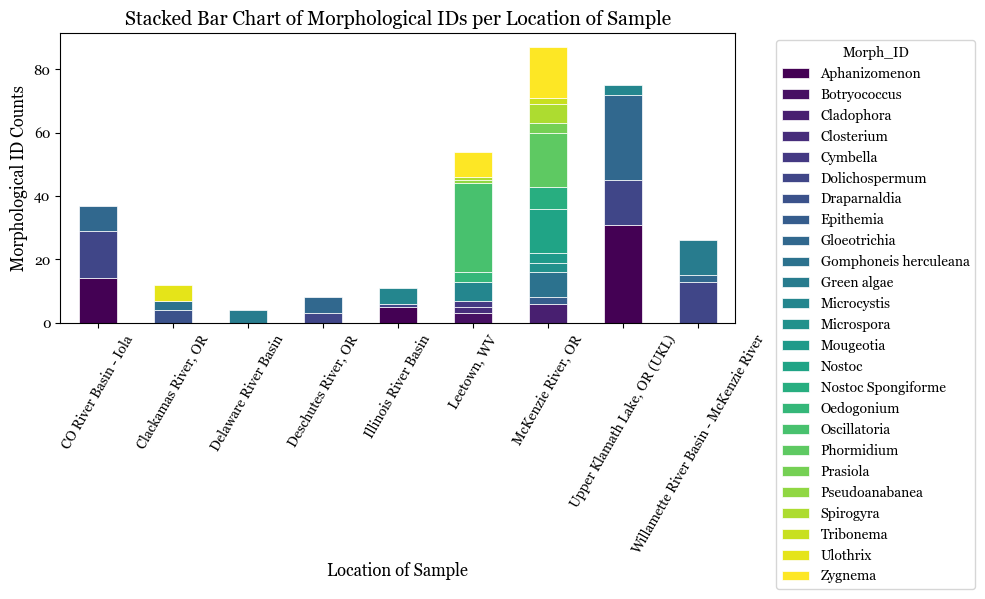

In [16]:
import os
import matplotlib.pyplot as plt

# colormap for Matplotlib >=3.7
viridis_cmap = plt.colormaps['viridis'].resampled(n_types)
viridis_colors = [viridis_cmap(i) for i in range(n_types)]

# the stacked bar chart
ax = counts_per_location.plot(kind='bar', stacked=True, figsize=(10,6), color=viridis_colors, edgecolor='white', linewidth=0.5)

# fonts
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Georgia']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

ax.set_ylabel("Morphological ID Counts")
ax.set_xlabel("Location of Sample")
ax.set_title("Stacked Bar Chart of Morphological IDs per Location of Sample")
ax.tick_params(axis='x', rotation=60)

ax.legend(title="Morph_ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# save
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "stacked_bar_chart.png")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig(file_path, dpi=300)
print(f"Figure saved to: {file_path}")

In [15]:
# taxa (Morph_IDs) present in McKenzie River, OR
mckenzie_taxa = counts_per_location.loc['McKenzie River, OR']
mckenzie_observed = mckenzie_taxa[mckenzie_taxa > 0].index.tolist()
print("Algae observed in McKenzie River, OR:")
for taxon in mckenzie_observed:
    print("-", taxon)

# all samples that have Dolichospermum present
dolichospermum_samples = counts_per_location[counts_per_location['Dolichospermum'] > 0].index.tolist()
print("\nSamples with Dolichospermum present:")
for sample in dolichospermum_samples:
    print("-", sample)

Algae observed in McKenzie River, OR:
- Cladophora
- Epithemia
- Gomphoneis herculeana
- Microspora
- Mougeotia
- Nostoc
- Nostoc Spongiforme
- Phormidium
- Prasiola
- Spirogyra
- Tribonema
- Zygnema

Samples with Dolichospermum present:
- CO River Basin - Iola
- Deschutes River, OR
- Illinois River Basin
- Upper Klamath Lake, OR (UKL)
- Willamette River Basin - McKenzie River


In [16]:
#plot points by algae type using geopandas
# built-in dataset (US) --> taken from kaggle
# first few rows
shapefile_path = "/Users/tianyichen/Desktop/CDJ Fa25/US_ShapeFile"
us_states = gpd.read_file(shapefile_path)

# first few rows
print(us_states.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.6432 38.16909, -82.643 38.16956,...  


(20.0, 60.0)

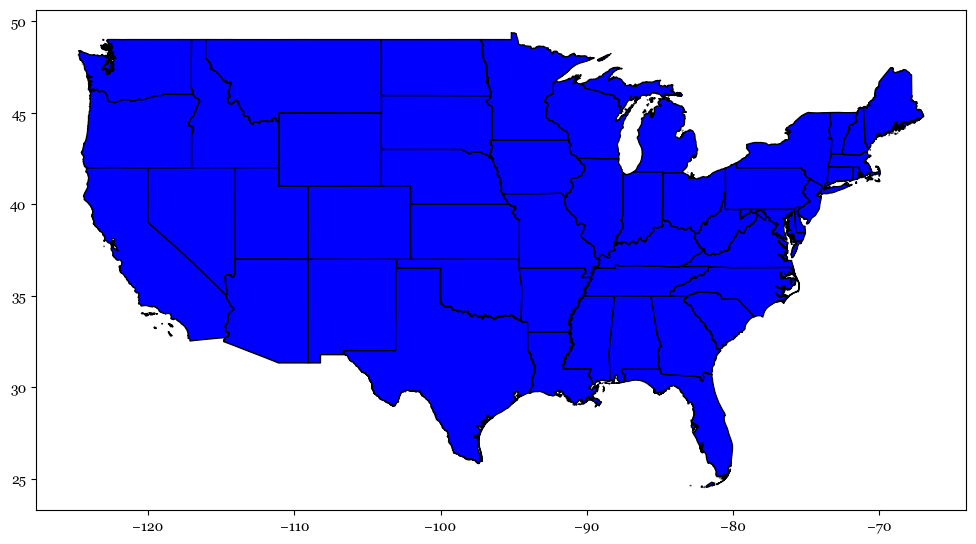

In [17]:
#plot
# keep only continental states
exclude = ['AK', 'HI', 'PR', 'GU', 'MP', 'VI', 'AS']
continental_us = us_states[~us_states['STUSPS'].isin(exclude)]
continental_us.plot(figsize=(12,8), color='blue', edgecolor='black')
ax.set_xlim(-130, -50)  
ax.set_ylim(20, 60)    

Plot saved to: CDJ_FA_25_MAP/IMAGES/US_SHAPE_MAP.jpg


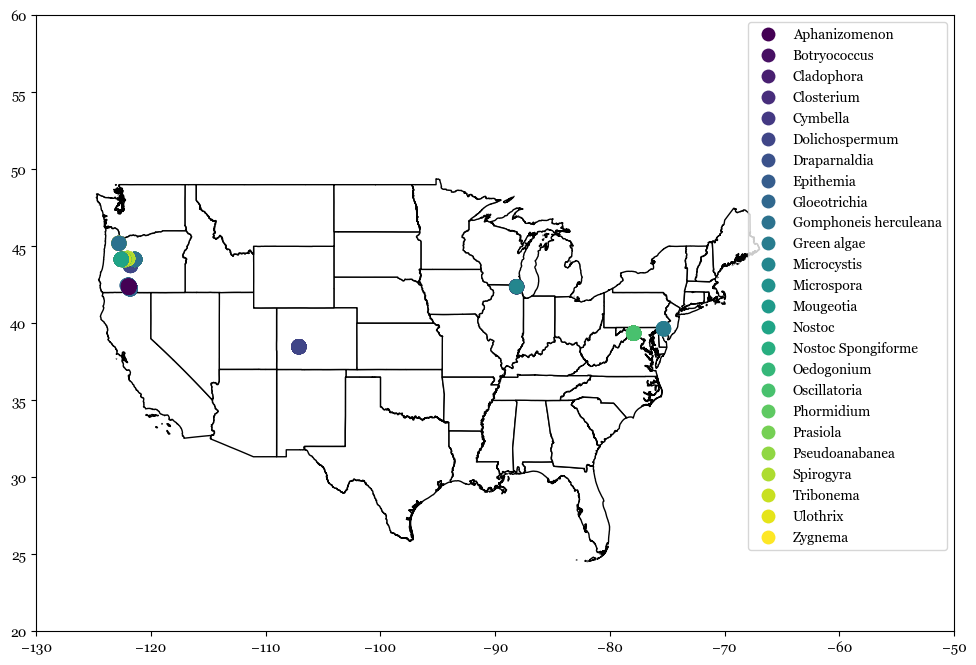

In [21]:
# geometry
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_final['Long'], df_final['Lat'])]
gdf = gpd.GeoDataFrame(df_final, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# continental US
continental_us = us_states[~us_states['STUSPS'].isin(['AK','HI','PR','GU','MP','VI','AS'])]

# basemap 
ax = continental_us.plot(color='white', edgecolor='black', figsize=(12,8))

# points on top with Viridis colormap
gdf.plot(ax=ax, column='Morphological ID', legend=True, cmap='viridis', markersize= 100)

# zoom to continental US
ax.set_xlim(-130, -50)
ax.set_ylim(20, 60)

# Save
output_directory = "CDJ_FA_25_MAP/IMAGES"
os.makedirs(output_directory, exist_ok=True)
full_path = os.path.join(output_directory, "US_SHAPE_MAP.jpg")

# figure from the axes
fig = ax.get_figure()
fig.savefig(full_path, dpi=300)  # dpi optional for higher quality

print(f"Plot saved to: {full_path}")

In [32]:
from scipy.stats import fisher_exact
import numpy as np

# contingency table: counts of Morph_ID per Location
counts_per_location = pd.crosstab(df_final['Location_x'], df_final['Morphological ID'])

print(counts_per_location)

Morphological ID                         Aphanizomenon  Botryococcus  \
Location_x                                                             
CO River Basin - Iola                               14             0   
Clackamas River, OR                                  0             0   
Delaware River Basin                                 0             0   
Deschutes River, OR                                  0             0   
Illinois River Basin                                 5             0   
Leetown, WV                                          0             3   
McKenzie River, OR                                   0             0   
Upper Klamath Lake, OR (UKL)                        31             0   
Willamette River Basin - McKenzie River              0             0   

Morphological ID                         Cladophora  Closterium  Cymbella  \
Location_x                                                                  
CO River Basin - Iola                             0  

In [33]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(counts_per_location)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 1069.718
Degrees of freedom: 192
P-value: 0.0000
